# Intersection droite exponentielle

\begin{enumerate}
    \item Afficher les courbes $y_{1} = x+3$ et $y_{2} = e^{x}$ pour $x\in[0;2]$
    \item On souhaite trouver le point d'intersection des 2 courbes, quelle est la fonction objectif et quelle est la variable de décision ?
    \item Utiliser la fonction leastsq de ma bibliothèque scipy.optimize pour déterminer la solution.
    \item Observer la valeur de la solution pour différents points de départ
    \item Restreindre la solution en précisant les bornes
\end{enumerate}

Résultat avec fsolv : xopt =  1.50524149579
Résultat avec Levenberg-Marquardt (leastsq) : xopt =  1.50524149579
Résultat avec Moindres carrés (least_squares) : xopt =  1.50524149579


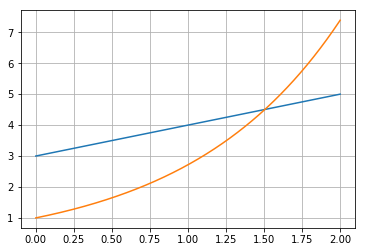

In [3]:
import numpy as np
from math import cos, e, exp
from lmfit.models import StepModel, LinearModel
import scipy
from scipy.optimize import least_squares
from scipy.optimize import fsolve
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda x: x + 3 - exp(x)
x = np.linspace(0,2,1000)
y1 = x+3
y2 = e**(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.grid()
x0 = 1.5#np.linspace(0,2,200)
resultfsolve=fsolve(f,x0)
print('Résultat avec fsolv : xopt = ',resultfsolve[0])
[resultlm,val] = leastsq(f,x0)
print('Résultat avec Levenberg-Marquardt (leastsq) : xopt = ',resultlm[0])
resultleastsquares=least_squares(f,x0, jac='2-point', bounds=(0,2))
print('Résultat avec Moindres carrés (least_squares) : xopt = ',resultleastsquares.x[0])

# Circuit redresseur à diode

In [3]:
f_interDiode = lambda vd : 1e-9*(exp(vd/(1.5*26e-3))-1)

In [4]:
def ecart(vd,u):
    u = 5 
    R = 100
    I0 = 1e-9
    Id = I0*(e**(vd/(1.5*26e-3))-1)
    Ir = (u-vd)/R
    return Id-Ir

In [5]:
u=5
R=100
I0 = 1e-9
vd = np.linspace(-5,.75,575)
Id = I0*(e**(vd/(1.5*26e-3))-1)
Ir =(u-vd)/R
vdd = leastsq(ecart,vd,5)

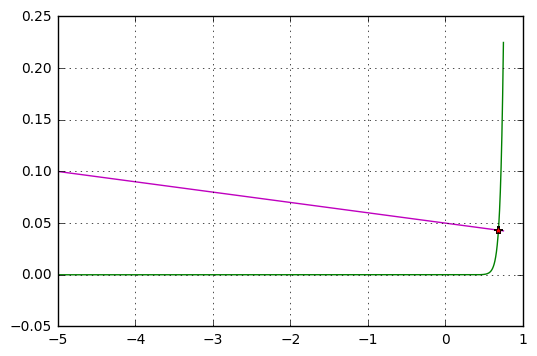

In [6]:
plt.plot(vd,Id,'g-')
plt.plot(vd,Ir,'m-')
plt.plot(vdd[0],(u-vdd[0])/R,'r*')
plt.grid()

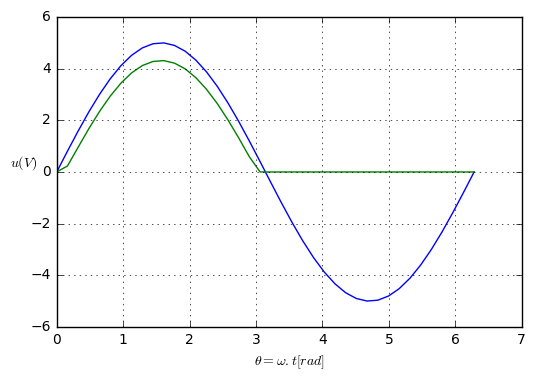

In [7]:
def residuals(vd, u):
        #u = 5 
        R = 100
        I0 = 1e-9
        Id = I0*(np.exp(vd/(1.5*26e-3))-1)
        Ir = (u-vd)/R
        err = Id-Ir
        return err

import matplotlib.pyplot as plt
%matplotlib inline    
wt = np.linspace(0,2*np.pi,40)
uu = 5*np.sin(wt)
ur = np.zeros(len(uu))
plt.grid()
for i in range (0,len(uu)):
    vdd = leastsq(residuals,1, args=(uu[i]))
    ur[i]=uu[i]-vdd[0]
    
plt.xlabel(r'$\theta = \omega.t [rad]$')
#plt.yticks(rotation=90)
plt.ylabel(r'$u(V)$',rotation=0)

plt.plot(wt,uu,'b-')
plt.plot(wt,ur,'g-')

In [8]:
len(uu)

40

# Recherche d'un minimum sur une surface

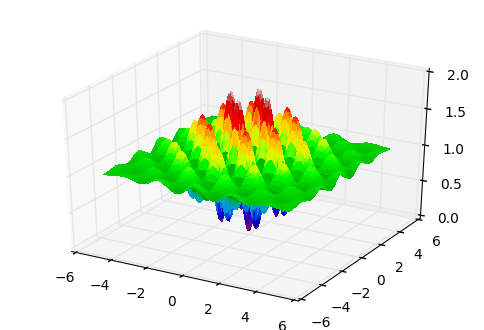

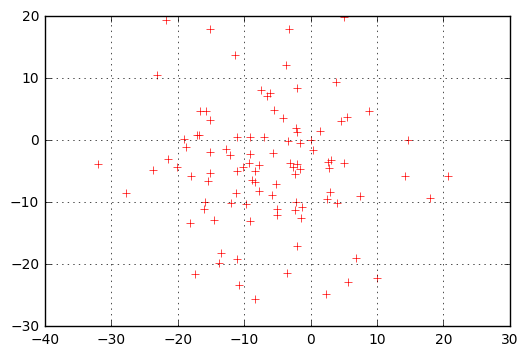

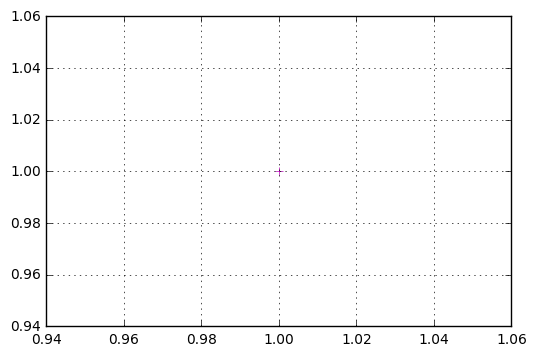

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
from scipy.optimize import leastsq
%matplotlib inline
fig1 = plt.figure()
ax = fig1.gca(projection='3d')
lim = 5
x = np.linspace(-lim,lim,100)
y = np.linspace(-lim,lim,100)
X,Y = np.meshgrid(x,y)
fsurfsinexp = lambda x1,x2 : 1 - cos(pi*x1)*cos(pi*x2)*exp(-(x1**2+x2**2)/10)

#Z = fsurfsinexp(X,Y)
#gca(projection='3d').plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.spectral_r,linewidth=0,antialiased=False))
#print(Z)
#plt.pcolormesh(X, Y, Z, shading="gouraud")
#plt.plot(X,Y,Z)
#plt.colorbar
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=C, antialiased=True)

Z = 1-cos(pi*X)*cos(pi*Y)*exp(-(X**2+Y**2)/10)
#Z=sin(sqrt(X**2+Y**2))
gca(projection='3d').plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.spectral,linewidth=0,antialiased=False)
#pour sauvegarder l'image en svg
#plt.savefig('bar_chart.svg',format="svg")
#plt.render_in_browser('bar_chart.svg')

nb = 100
themin = 1000
xmin = [0,0]
x0 = np.zeros((nb,2))
xest=np.zeros((nb,1))
for i in range(1,nb):
    x0[i,0] = np.random.randn(1,1)*2*lim-lim
    x0[i,1] = np.random.randn(1,1)*2*lim-lim
    [x,val] = leastsq(fsurfsinexp,x0[i,:], x0[i,:])
    xest[i]=x0[i,0]
    if (val < themin):
        themin=val
        xmin=val
    
fig2 = plt.figure()
plt.plot(x0[:,0],x0[:,1],'r+')
plt.grid()

fig3=plt.figure()
plt.plot(xmin, themin,'m+')
plt.grid()

# Caractérisation voltampèremétrique d'une résistance

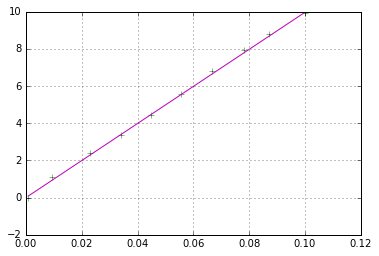

In [53]:
import numpy as np
from lmfit.models import StepModel, LinearModel
from scipy import *
from scipy.optimize import least_squares
from scipy.optimize import fsolve
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline    

f_interResistance = lambda R,I: R*I
erreur = lambda R,I,U: U - f_interResistance(R,I)

R=100
U=np.linspace(0,10,10)
I = U/R
Vb = U+.1*np.random.randn(len(U))
Ib = I+.001*np.random.randn(len(I))
Rc1 = leastsq(erreur, 0, args=(Ib,Vb))
Rc2 = curve_fit(f_interResistance, Ib,Vb)
plt.plot(Ib,Vb,'g+')
plt.grid()
plt.plot(Ib,f_interResistance(Rc[0],Ib),'m-')


In [44]:
from lmfit import minimize, Parameters

In [45]:
Rc2

(array([ 99.62569374]), array([[ 0.14445277]]))

In [46]:
Rc1

(array([ 99.62569374]), 1)

# Caractérisation des paramètres ellipsométrique $\Psi$ et $\Delta$

* Pour $\Psi = \dfrac{\pi}{4}$ et $\Delta = \dfrac{\pi}{4}$, calculer la roetation $\alpha_{m}$ sur un tour et ajouter du bruit 
* Utiliser la fonction \emph{leastsq} pour déterminer la solution, et la comparer avec la valeur théorique, observer la solution pour différents points de départs. 

In [1]:
import numpy as np
from lmfit.models import StepModel, LinearModel
from scipy import *
from scipy.optimize import least_squares
from scipy.optimize import fsolve
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline    

def f_alpha(param,theta):
    Psi = param[0]
    Delta = param[1]
    alpha = 0.5*np.arctan2(2*tan(theta)*tan(Psi)*cos(Delta),(tan(Psi))**2 - (tan(theta))**2 )-theta
    alpha = np.unwrap(alpha*2)/2
    return alpha

psi = np.pi/4
delta = np.pi/4
theta = np.linspace(0,2*pi,200)

bruit = 0.01
alpham = lambda psi,delta,theta : f_alpha([psi,delta],theta)+bruit*np.random.randn(l)
x0 = [pi/4,pi/4]

#xc = leastsq(alpham,x0,theta,alpham)
#plot(theta,alpham,theta,f_alpha(xc,theta))

In [3]:
alpham

NameError: name 'alpham' is not defined

# Résolution du système d'équation non linéaires :

La résolution du système d'équations suivant :

\begin{align*}
\begin{cases}
      1-2cos(3\alpha_{1})+2cos(3\alpha_{2})=0 \\
      1-2cos(5\alpha_{1})+2cos(5\alpha_{2})=0\\
\end{cases}
\end{align*}

In [3]:
from sympy import Symbol, nsolve
#import sympy
import mpmath as mp
mp.dps = 15
x1 = Symbol('x1')
x2 = Symbol('x2')
f1 = 3 * x1**2 - 2 * x2**2 - 1
f2 = x1**2 - 2 * x1 + x2**2 + 2 * x2 - 8
print(nsolve((f1, f2), (x1, x2), (-1, 1)))

Matrix([[-1.19287309935246], [1.27844411169911]])


In [4]:
from numpy import *
from math import cos, e, exp
import scipy
from scipy.optimize import fsolve

def equations(p):
    x, y = p
    return (-1-2*cos(3*x*pi/180)+2*cos(3*y*pi/180),-1-2*cos(5*x*pi/180)
            +2*cos(5*y*pi/180))

resultfsolve =  fsolve(equations, (20, 30))
print('Résultat avec fsolv : alpha opt = ',resultfsolve,'°')


Résultat avec fsolv : alpha opt =  [ 33.32767956  23.64494419] °


In [5]:
import numpy as np
from math import cos, e, exp
#from lmfit.models import StepModel, LinearModel
import scipy
from scipy.optimize import least_squares
from scipy.optimize import fsolve
from scipy.optimize import leastsq

def equations(p):
    x, y = p
    return (-1-2*cos(3*x*np.pi/180)+2*cos(3*y*np.pi/180),-1-2*cos(5*x*np.pi/180)+2*cos(5*y*np.pi/180) )


resultfsolve =  fsolve(equations, (20, 30))
print('Résultat avec fsolv : alpha opt = ',resultfsolve,'°')


Résultat avec fsolv : alpha opt =  [ 33.32767956  23.64494419] °
